<ipython-input-1-5d6f0ade6b7a>:25: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")


Optimization terminated successfully.
         Current function value: 0.326323
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                26952
Model:                          Logit   Df Residuals:                    26944
Method:                           MLE   Df Model:                            7
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.5216
Time:                        17:45:36   Log-Likelihood:                -8795.1
converged:                       True   LL-Null:                       -18385.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -58.4867      2.108    -27.741      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


         Airbnb Host ID  Superhost  Logistic Regression Predicted Probability  \
0                2259.0        0.0                                   0.000000   
70               4869.0        0.0                                   0.000486   
103              7322.0        0.0                                   0.000000   
122              7356.0        0.0                                   0.000000   
155              8967.0        0.0                                   0.000000   
...                 ...        ...                                        ...   
1976305     331132678.0        0.0                                   0.000000   
1976316     335592920.0        0.0                                   0.000000   
1976320      18542709.0        0.0                                   0.343162   
1976344     336537667.0        0.0                                   0.000000   
1976346     161724560.0        0.0                                   0.000000   

         Gradient Boosting 

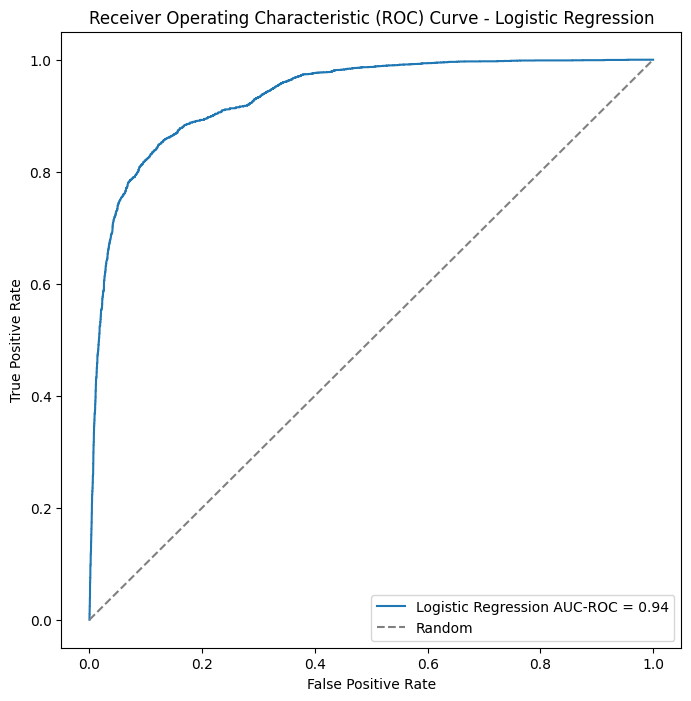

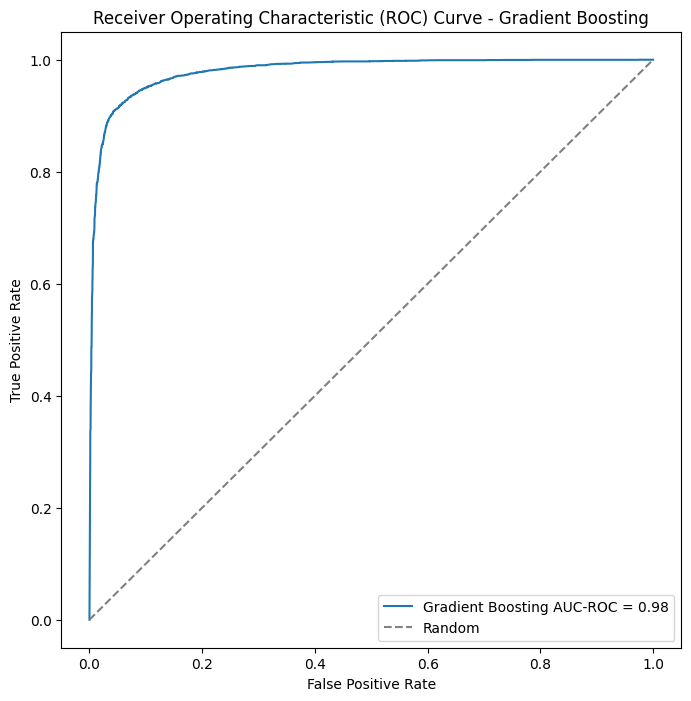

In [ ]:
#logit, gradientboosting
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc,
)
import statsmodels.api as sm
import matplotlib.pyplot as plt

# List of cities
cities = ["New York", "Chicago", "Los Angeles", "Dallas", "Houston", "Miami", "Oakland", "Philadelphia", "Washington", "Boston"]

# Load data for multiple cities
df = pd.DataFrame()  # Initialize an empty DataFrame

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)


# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='first')

# Selecting relevant features for logistic regression
features = [
    'rating_ave_pastYear',
    'numReviews_pastYear',
    'numCancel_pastYear',
    'num_5_star_Rev_pastYear',
    'prop_5_StarReviews_pastYear',
    'hostResponseNumber_pastYear',
    'hostResponseAverage_pastYear',
]

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the logistic regression model
logistic_model = LogisticRegression()

# Using statsmodels to get summary
X_train_with_intercept = sm.add_constant(X_train)  # Add intercept term
log_reg_sm = sm.Logit(y_train, X_train_with_intercept)
result = log_reg_sm.fit()

# Display summary for logistic regression
print(result.summary())

# Fitting the logistic regression model on the training data
logistic_model.fit(X_train, y_train)

# Making predictions on the testing data for logistic regression
logistic_predictions = logistic_model.predict(X_test)

# Calculate predicted probabilities for logistic regression
logistic_predicted_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Initializing the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=150,learning_rate=0.05,random_state=42)

# Fitting the Gradient Boosting model on the training data
gb_model.fit(X_train, y_train)

# Making predictions on the testing data for Gradient Boosting
gb_predictions = gb_model.predict(X_test)

# Calculate predicted probabilities for Gradient Boosting
gb_predicted_probabilities = gb_model.predict_proba(X_test)[:, 1]

# Display predicted probabilities in the original dataframe for logistic regression
filtered_df['Logistic Regression Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Logistic Regression Predicted Probability'] = logistic_predicted_probabilities

# Display predicted probabilities in the original dataframe for Gradient Boosting
filtered_df['Gradient Boosting Predicted Probability'] = 0  # Initialize with zeros
filtered_df.loc[X_test.index, 'Gradient Boosting Predicted Probability'] = gb_predicted_probabilities

# Display predicted probabilities in the original dataframe
print(filtered_df[['Airbnb Host ID', 'Superhost', 'Logistic Regression Predicted Probability', 'Gradient Boosting Predicted Probability']])

# Calculate accuracy for logistic regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')

# Calculate accuracy for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

# Confusion matrix for logistic regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
print(f'Logistic Regression Confusion Matrix:\n{logistic_conf_matrix}')

# Confusion matrix for Gradient Boosting
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)
print(f'Gradient Boosting Confusion Matrix:\n{gb_conf_matrix}')

# Classification report for logistic regression
logistic_classification_rep = classification_report(y_test, logistic_predictions)
print(f'Logistic Regression Classification Report:\n{logistic_classification_rep}')

# Classification report for Gradient Boosting
gb_classification_rep = classification_report(y_test, gb_predictions)
print(f'Gradient Boosting Classification Report:\n{gb_classification_rep}')

# Calculate AUC for ROC curve for logistic regression
logistic_y_proba = logistic_model.predict_proba(X_test)[:, 1]
logistic_auc_roc = roc_auc_score(y_test, logistic_y_proba)

# Calculate AUC for ROC curve for Gradient Boosting
gb_y_proba = gb_model.predict_proba(X_test)[:, 1]
gb_auc_roc = roc_auc_score(y_test, gb_y_proba)


# Plot ROC curve for logistic regression
logistic_fpr, logistic_tpr, logistic_thresholds_roc = roc_curve(y_test, logistic_y_proba)
plt.figure(figsize=(8, 8))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression AUC-ROC = {logistic_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

# Plot ROC curve for Gradient Boosting
gb_fpr, gb_tpr, gb_thresholds_roc = roc_curve(y_test, gb_y_proba)
plt.figure(figsize=(8, 8))
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting AUC-ROC = {gb_auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend()
plt.show()

In [ ]:
#Predictied probability by GB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# List of cities
cities = ["New York", "Chicago", "Los Angeles", "Dallas", "Houston", "Miami", "Oakland", "Philadelphia", "Washington", "Boston"]

# Load data for multiple cities
df = pd.DataFrame()  # Initialize an empty DataFrame

for city in cities:
    df1 = pd.read_csv(f"airbnb_{city}.csv")
    df = pd.concat([df, df1], ignore_index=True)

# Convert the 'Scraped Date' column to datetime format
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Filter the data for values between May 2020 and June 2020
filtered_df = df[(df['Scraped Date'] >= '2020-05-01') & (df['Scraped Date'] <= '2020-06-30')]

# Keep only unique samples based on 'Airbnb Host ID'
filtered_df = filtered_df.drop_duplicates(subset='Airbnb Host ID', keep='last')

# Selecting relevant features for the model
features = ['rating_ave_pastYear', 'numReviews_pastYear', 'numCancel_pastYear', 'num_5_star_Rev_pastYear',
            'prop_5_StarReviews_pastYear', 'hostResponseNumber_pastYear', 'hostResponseAverage_pastYear']

# Creating feature matrix X and target variable y
X = filtered_df[features]
y = filtered_df['Superhost']

# Drop rows with missing values in features
X = X.dropna()
y = y[X.index]  # Align y with the remaining rows in X

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing the Gradient Boosting classifier
model = GradientBoostingClassifier()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Calculate predicted probabilities for the entire dataset (with missing values handled)
X_complete = filtered_df[features].dropna()
predicted_probabilities_complete = model.predict_proba(X_complete)[:, 1]

# Create a new DataFrame for the results
results_df = filtered_df[['Airbnb Host ID', 'Superhost']].copy()
results_df['Predicted Probability'] = pd.Series(index=X_complete.index, data=predicted_probabilities_complete)

# Fill missing predicted probabilities with NaN
results_df['Predicted Probability'] = results_df['Predicted Probability'].fillna(value=np.nan)

# Drop rows with 'Predicted Probability' as zero or blank (NaN)
results_df = results_df[results_df['Predicted Probability'] != 0]
results_df = results_df.dropna(subset=['Predicted Probability'])

# Drop rows with 'Superhost' as one
results_df = results_df[results_df['Superhost'] != 1]

# Display the final DataFrame
print(results_df)

# Exporting to CSV
results_df.to_csv('predicted_probabilities_all.csv', index=False)

<ipython-input-2-cd8ed485dfc0>:14: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(f"airbnb_{city}.csv")


         Airbnb Host ID  Superhost  Predicted Probability
70               4869.0        0.0               0.005481
103              7322.0        0.0               0.015785
122              7356.0        0.0               0.006034
155              8967.0        0.0               0.004948
232              8380.0        0.0               0.020126
...                 ...        ...                    ...
2075343       2006852.0        0.0               0.021336
2075349        814298.0        0.0               0.003165
2075351        970787.0        0.0               0.008660
2075356     161724560.0        0.0               0.887033
2075364     212359760.0        0.0               0.003087

[28991 rows x 3 columns]


In [ ]:
#decile
import pandas as pd

# Load the CSV file
df = pd.read_csv('predicted_probabilities_all.csv')

# Ensure 'Predicted Probability' is numeric
df['Predicted Probability'] = pd.to_numeric(df['Predicted Probability'], errors='coerce')

# Drop rows with NaN in 'Predicted Probability'
df = df.dropna(subset=['Predicted Probability'])

# Create deciles
df['Decile'] = pd.qcut(df['Predicted Probability'], 20, labels=False) + 1


# Calculate the count of Airbnb Host IDs and the average predicted probability for each decile
decile_summary = df.groupby('Decile').agg(Host_ID_Count=('Airbnb Host ID', 'count'),
                                          Average_Predicted_Probability=('Predicted Probability', 'mean'))

# Reset index for better presentation
decile_summary = decile_summary.reset_index()

# Display the summary
print(decile_summary)

decile_summary.to_csv('decile_all.csv', index=False)

    Decile  Host_ID_Count  Average_Predicted_Probability
0        1           1451                       0.001943
1        2           1449                       0.002870
2        3           1466                       0.003713
3        4           1433                       0.004634
4        5           1449                       0.005455
5        6           1450                       0.006620
6        7           1457                       0.008009
7        8           1443                       0.009679
8        9           1448                       0.011896
9       10           1452                       0.013921
10      11           1848                       0.017701
11      12           1050                       0.020712
12      13           1448                       0.026847
13      14           1454                       0.036902
14      15           1445                       0.054347
15      16           1450                       0.081859
16      17           1449      